<h1><center>Premier League 2020/21 - Data Analysis</center></h1>
<hr>

### Réalisé Par:
* Bouaskaoun Mohammed
* Bentaleb Saad

<p><center><img src="https://www.insidesport.in/wp-content/uploads/2021/08/skysports-grpahic-graphic-premier-league_5415970.png?w=1024&h=1&crop=1" alt="English_PremierLeague_Analysis"/></center></p>

## Introduction
Exploratory Data Analysis (EDA) was originally developed by an American mathematician called John Tukey in the 1970s. It is widely used today in the data discovery process. Exploring data and gaining insights is fundamental in understanding the data before performing any Machine Learning tasks. EDA refers to the critical process of performing an initial investigation on data to discover patterns, spot anomalies/errors, test a hypothesis, or check assumptions with the help of summary statistics or graphical representations. Graphical techniques used in EDA include plotting the raw data (such as histograms, probability plots, block plots), and plotting simple statistics such as mean plots, box plots etc. This provides a solid understanding of the dataset variables and the relationship between them. In this article, we will have an understanding of EDA process with the help of the English Premier League 2020-21 season dataset.
## Description of Features
The table shows a short description of each EPL dataset feature:

| Feature | Description |
| --- | --- |
| Name | Name of the player |
| Club | Club of the player |
| Nationality | Country origin of the player |
| Position | Position for which the player plays |
| Age | Age of player |
| Matches | Number of matches played |
| Starts | Number of times the player was in the starting lineup of the match |
| Mins | Number of minutes the player played overall |
| Goals | Number of goals scored by the player |
| Assists | Number of assists given by the player |
| Passes_Attempted | The number of passes attempted by the player |
| Perc_Passes_Completed | The number of passes that the player accurately passed to his teammate |
| Penalty_Goals | Total penalty goals scored by a player |
| Penalty_Attempted | Total penalties taken by a player |
| xG (Expected Goal) | The probability of a shot likely to be converted into a goal. The closer the shot is to the goal, the higher is the xG |
| xA (Expected Assist) | The probability of a pass being a goal assist |
| Yellow_Cards | Total number of yellow cards accrued by a player |
| Red_Cards | Total number of red cards accrued by a player |

## Questions
1. comment l'âge d'un joueur affecte-t-il sa valeur sur le marché ( aussi son performance)?
2. joueurs de quelle région sont les plus susceptibles de signer un grand club ?
3. est-ce qu'être un joueur célèbre signifie toujours être performent ( dans les grandes clubes ) ?
4. quel est l'âge des meilleures performances à chaque poste ?
5. quels sont les meilleurs choix (par rapport au prix) pour un débutant en fantasy qui sont le plus susceptibles de gagner un maximum de points de performance ?
7. pour répondre à ces questions, nous pouvons utiliser anova et ACP ou ACF , nous pouvons également utiliser la classification et d'autres techniques.
## Méthodes d'analyse des données

Le présent rapport contient les méthodes d'analyse des données suivantes:
- ANOVA
- Regression Lineare
- ACP
- Classification héarchique
## Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats
import statsmodels.api as sm
import scipy.cluster.hierarchy as shc
import matplotlib as mpl
import matplotlib.cm as cm
from scipy.spatial import ConvexHull
from sklearn.decomposition import PCA
from matplotlib.ticker import PercentFormatter
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
#Chargement des données
epl_df = pd.read_csv('data/EPL_20_21(1).csv')
epl_df

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Clean_Sheet
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,16
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,16
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,16
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,16
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,50,80.0,0,0,0.22,0.10,0,0,5
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,77,77.9,0,0,0.00,0.00,0,0,5
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,0,12,0,0,3,100.0,0,0,0.00,0.00,0,0,5
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.00,0,0,5


In [3]:
#Correction de la position des joueurs
epl_df["Position"] =  epl_df["Position"].str[:2]
#Ajout des colonnes generee
#Nombre moyen de but marquéé par matche
epl_df['GoalsPerMatch'] = (epl_df['Goals']/epl_df['Matches']).astype(float)
#Nombre moyen de minutes jouee par matche
epl_df['MinsPerMatch'] = (epl_df['Mins']/epl_df['Matches']).astype(int)
#Points de performance "Fantasy"
epl_df['PointsOfFantasy'] = epl_df['Goals']*4 + epl_df['Assists']*3 + epl_df['Matches']*1 + epl_df['Clean_Sheet']*2 - epl_df['Yellow_Cards'] - epl_df['Red_Cards']*3 -(epl_df['Penalty_Attempted']-epl_df['Penalty_Goals'])*2 + epl_df['Penalty_Goals']
#classification par performance manuellement
Performance_Cat = []
for pts in epl_df["PointsOfFantasy"].astype(int):
    if pts >= 100:
        Performance_Cat.append("Top")
    elif pts >= 50:
        Performance_Cat.append("Avg")
    else:
        Performance_Cat.append("Low")

epl_df["Performance_Cat"] = Performance_Cat
#classification par joueur locale et externe
local_foreign = []
for nat in epl_df["Nationality"]:
    if nat == 'ENG':
        local_foreign.append("Local")
    else:
        local_foreign.append("Foreign")

epl_df["Local_Foreign"] = local_foreign
#classification par age
Age_Cat = []
for cat in epl_df["Age"].astype(int):
    if cat < 20:
        Age_Cat.append("Under20")
    elif cat >= 20 and cat <25:
        Age_Cat.append("20-25")    
    elif cat >= 25 and cat <30:
        Age_Cat.append("25-30")
    else:
        Age_Cat.append("Over30")

epl_df["Age_Cat"] = Age_Cat

epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,xA,Yellow_Cards,Red_Cards,Clean_Sheet,GoalsPerMatch,MinsPerMatch,PointsOfFantasy,Performance_Cat,Local_Foreign,Age_Cat
0,Mason Mount,Chelsea,ENG,MF,21,36,32,2890,6,5,...,0.24,2,0,16,0.166667,80,106,Top,Local,20-25
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,...,0.00,2,0,16,0.000000,88,61,Avg,Foreign,25-30
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,...,0.21,2,0,16,0.171429,74,113,Top,Foreign,20-25
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,...,0.11,3,0,16,0.111111,84,83,Avg,Local,20-25
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,...,0.12,3,0,16,0.031250,74,71,Avg,Local,20-25


In [4]:
#Information sur les donnees
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [5]:
#Description des donnees
epl_df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Clean_Sheet,GoalsPerMatch,MinsPerMatch,PointsOfFantasy
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226,10.077068,0.072531,63.607143,48.686090
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268,3.431833,0.116598,25.001879,27.274105
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,9.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,8.000000,0.000000,49.000000,28.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000,10.000000,0.027778,71.000000,43.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000,11.000000,0.091991,84.000000,60.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000,19.000000,0.657143,90.000000,196.000000


<AxesSubplot:>

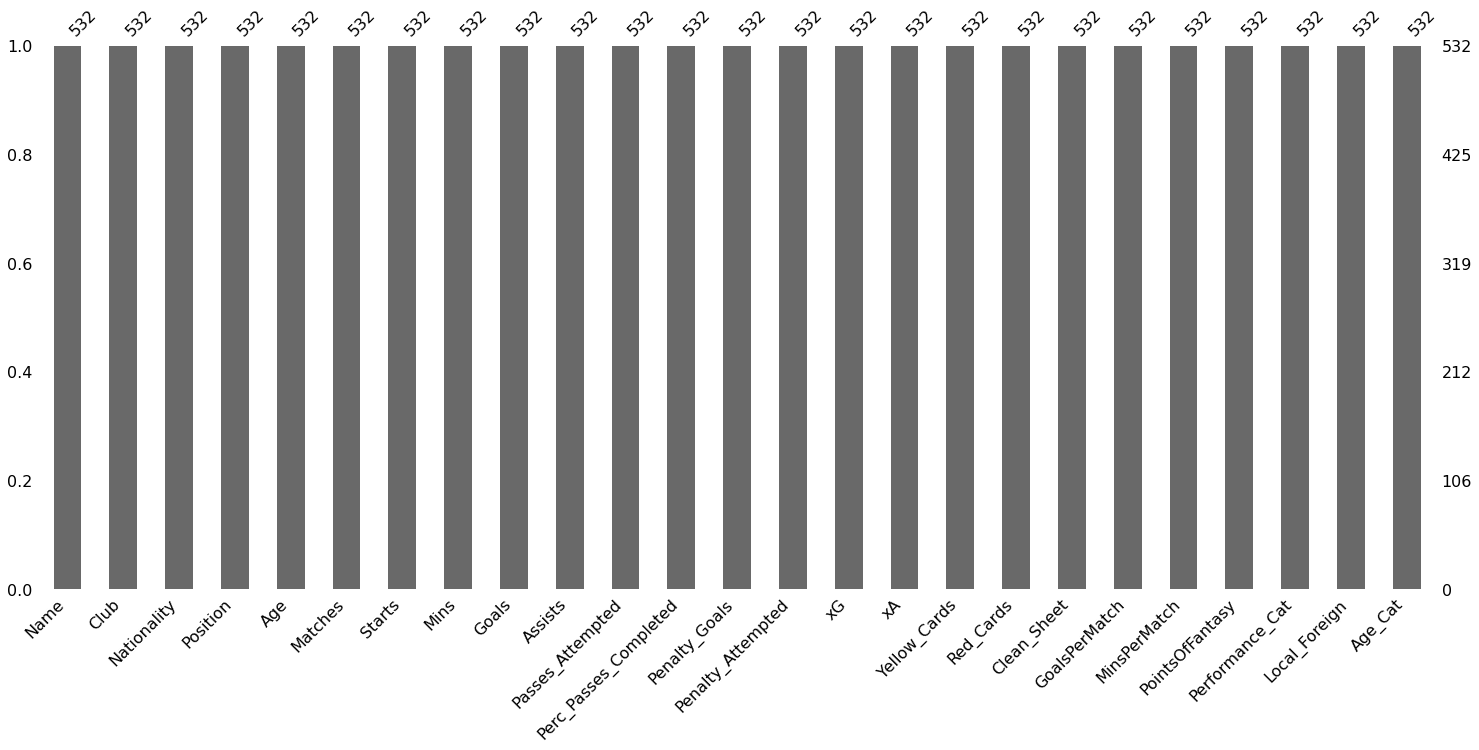

In [6]:
#Graphe des valeurs null
msno.bar(epl_df)

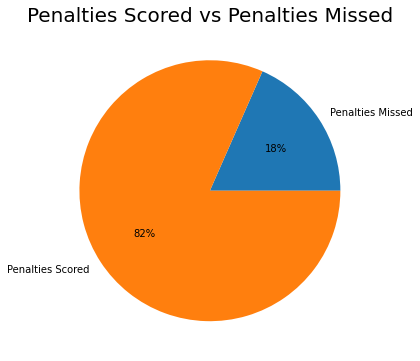

In [7]:
#Graph de niveau de perte des penalties
total_goals = epl_df['Goals'].sum()
total_penalty_attempted = epl_df['Penalty_Attempted'].sum()
total_penalty_goals = epl_df['Penalty_Goals'].sum()
plt.figure(figsize=(13, 6))
penalty_not_scored = total_penalty_attempted - total_penalty_goals
data = [penalty_not_scored, total_penalty_goals]
labels = ['Penalties Missed', 'Penalties Scored']
colors = sns.color_palette()
plt.title('Penalties Scored vs Penalties Missed', fontsize = 20)
plt.pie(data, labels = labels, colors = colors, autopct = '%.0f%%')
plt.show()

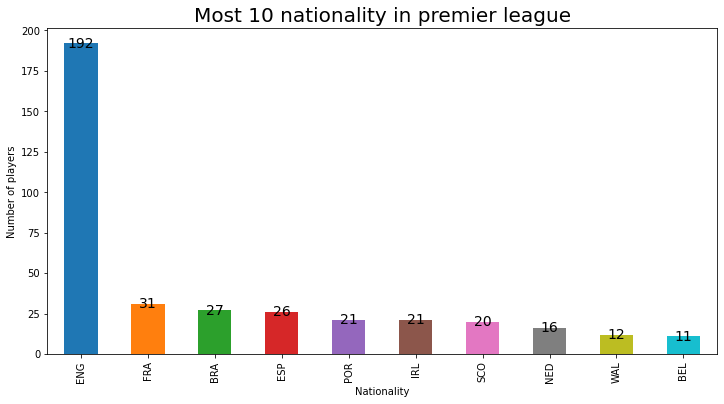

In [8]:
#Graph des nationnalités domminants dans la premier league
nationality = epl_df.groupby('Nationality').size().sort_values(ascending = False)
head = nationality.head(10)
ax = head.plot(kind='bar', figsize=(12, 6),xlabel='Nationality', ylabel='Number of players', color = sns.color_palette())
for ig, dg in enumerate(head):
    plt.text(x=ig, y=dg, s=f"{dg}", fontdict=dict(fontsize=14), horizontalalignment='center', verticalalignment='center')
plt.title('Most 10 nationality in premier league', fontsize = 20)
plt.show()

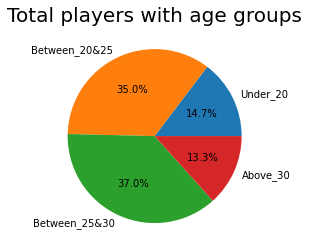

In [9]:
#Graphe de distribution d'age en premier league
players_under_20 = epl_df[epl_df['Age'] <= 20]
plyayers_between_20_25 = epl_df[(epl_df['Age'] > 20) & (epl_df['Age'] <= 25)]
players_between_25_30 = epl_df[(epl_df['Age'] > 25) & (epl_df['Age'] <= 30)]
players_above_30 = epl_df[epl_df['Age'] > 30]
x = np.array([players_under_20['Name'].count(), plyayers_between_20_25['Name'].count(), players_between_25_30['Name'].count(), players_above_30['Name'].count()])
myLabels = ['Under_20','Between_20&25','Between_25&30','Above_30']
plt.title('Total players with age groups', fontsize = 20)
plt.pie(x, labels = myLabels, autopct = '%.1f%%')
plt.show()

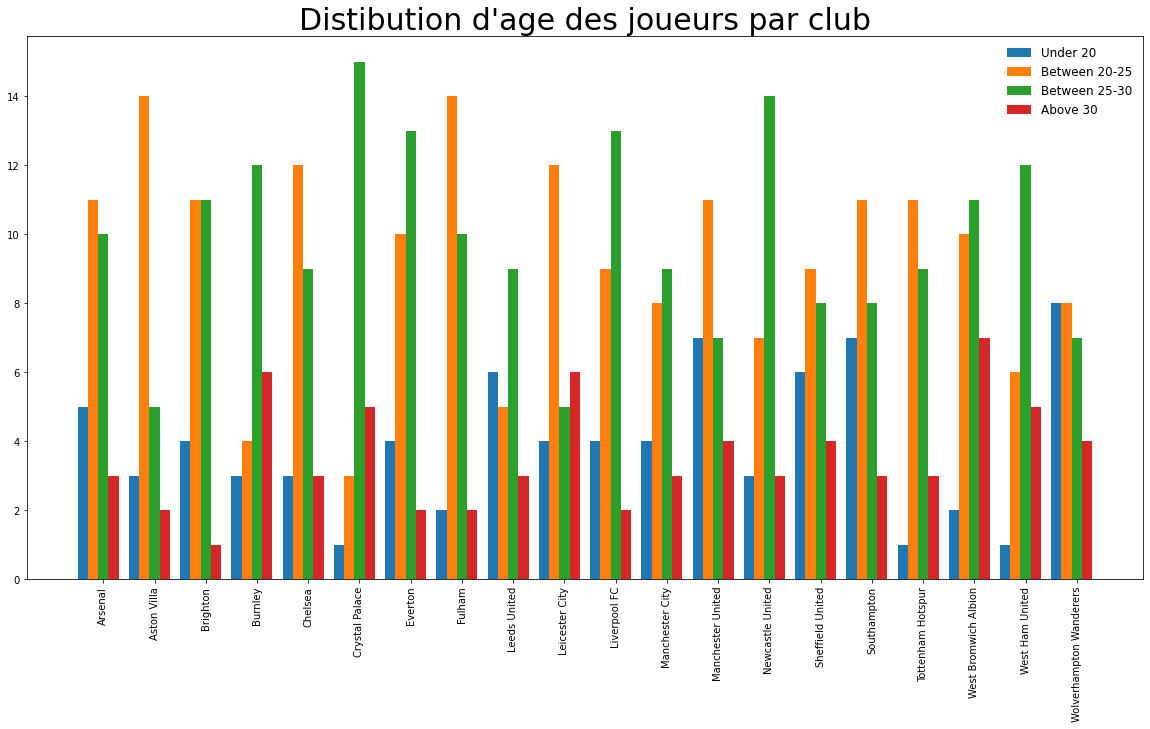

In [10]:
#Graphe de distibution d'age par club
x1 = players_under_20[['Age', 'Club']].groupby('Club').count()['Age']
x2 = plyayers_between_20_25[['Age', 'Club']].groupby('Club').count()['Age']
x3 = players_between_25_30[['Age', 'Club']].groupby('Club').count()['Age']
x4 = players_above_30[['Age', 'Club']].groupby('Club').count()['Age']
clubs = players_under_20[['Age', 'Club']].groupby('Club').count().index

fig, ax = plt.subplots(figsize=(20, 10))

X_axis = np.arange(len(clubs))
plt.bar(X_axis - 0.4, x1, 0.2, label = "Under 20")
plt.bar(X_axis - 0.2, x2, 0.2,label = "Between 20-25")
plt.bar(X_axis, x3, 0.2, label = "Between 25-30")
plt.bar(X_axis + 0.2, x4, 0.2,label = "Above 30")

plt.xticks(X_axis, clubs, rotation = 90)
plt.title('Distibution d\'age des joueurs par club', fontsize = 30)

#for index, data in enumerate(x1):
#    plt.text(x=index , y=data/2 , s=f"{data}" , fontdict=dict(fontsize=14), horizontalalignment='center')
#for index, data in enumerate(x2):
#    plt.text(x=index , y= x1[index] + ((data -x1[index]) /2) , s=f"{data - x1[index]}" , fontdict=dict(fontsize=14), horizontalalignment='center')
#for index, data in enumerate(x3):
#    plt.text(x=index , y= x2[index] + ((data -x2[index]) /2) , s=f"{data -x2[index]}" , fontdict=dict(fontsize=14), horizontalalignment='center')
#for index, data in enumerate(x4):
#    plt.text(x=index , y= data + ((data -x3[index]) /2) , s=f"{data -x3[index]}" , fontdict=dict(fontsize=14), horizontalalignment='center')
ax.legend(fontsize=12, frameon=False)
plt.show()

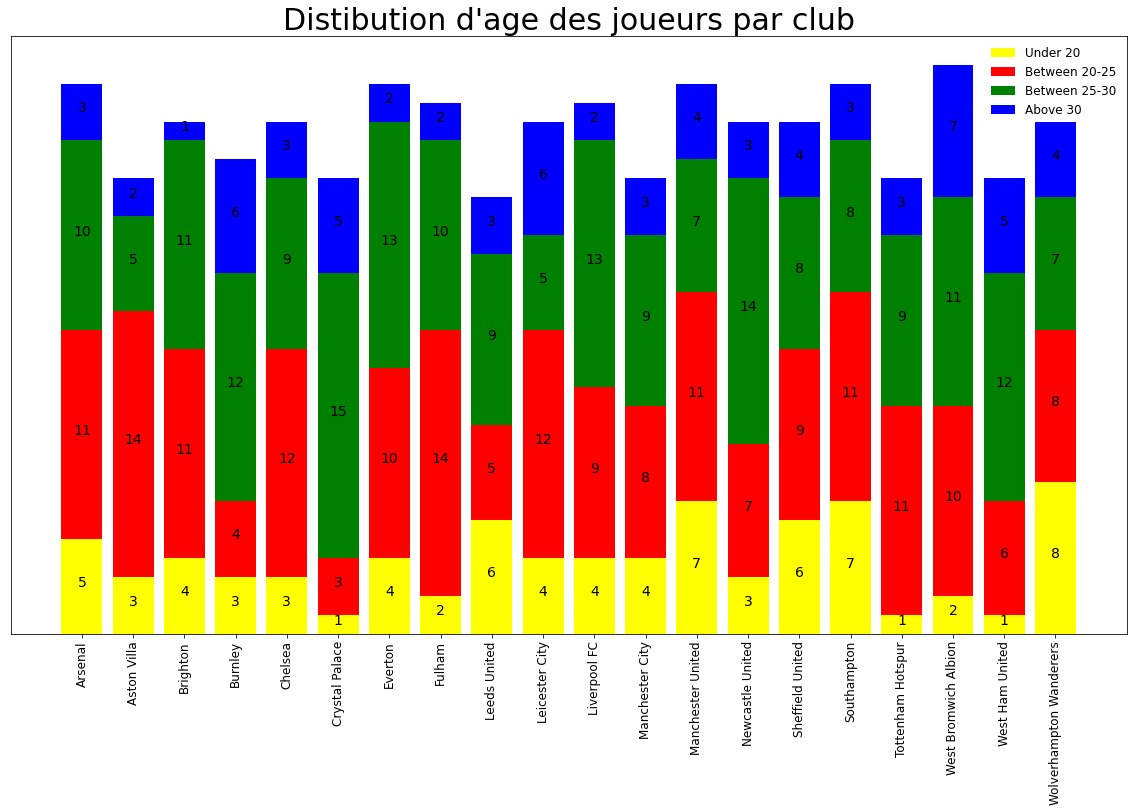

In [11]:
#Graphe de distibution d'age par club
x1 = players_under_20[['Age', 'Club']].groupby('Club').count()['Age']
x2 = plyayers_between_20_25[['Age', 'Club']].groupby('Club').count()['Age'] + x1
x3 = players_between_25_30[['Age', 'Club']].groupby('Club').count()['Age'] + x2
x4 = players_above_30[['Age', 'Club']].groupby('Club').count()['Age'] + x3
clubs = players_under_20[['Age', 'Club']].groupby('Club').count().index

fig, ax = plt.subplots(figsize=(20, 11))

ax.bar(clubs, x1, label = "Under 20", color='yellow')
ax.bar(clubs, x2 - x1,bottom= x1,label = "Between 20-25", color='r')
ax.bar(clubs, x3 - x2,bottom= x2, label = "Between 25-30",color='g')
ax.bar(clubs, x4 - x3,bottom= x3,label = "Above 30", color='b')

plt.xticks(clubs,rotation = 90, fontsize=12)
plt.yticks(np.arange(32,30), fontsize=12)
plt.title('Distibution d\'age des joueurs par club', fontsize = 30)

for index, data in enumerate(x1):
    plt.text(x=index , y=data/2 , s=f"{data}" , fontdict=dict(fontsize=14), horizontalalignment='center')
for index, data in enumerate(x2):
    plt.text(x=index , y= x1[index] + ((data -x1[index]) /2) , s=f"{data - x1[index]}" , fontdict=dict(fontsize=14), horizontalalignment='center')
for index, data in enumerate(x3):
    plt.text(x=index , y= x2[index] + ((data -x2[index]) /2) , s=f"{data -x2[index]}" , fontdict=dict(fontsize=14), horizontalalignment='center')
for index, data in enumerate(x4):
    plt.text(x=index , y= x3[index] + ((data -x3[index]) /2) , s=f"{data -x3[index]}" , fontdict=dict(fontsize=14), horizontalalignment='center')
ax.legend(fontsize=12, frameon=False)
plt.show()

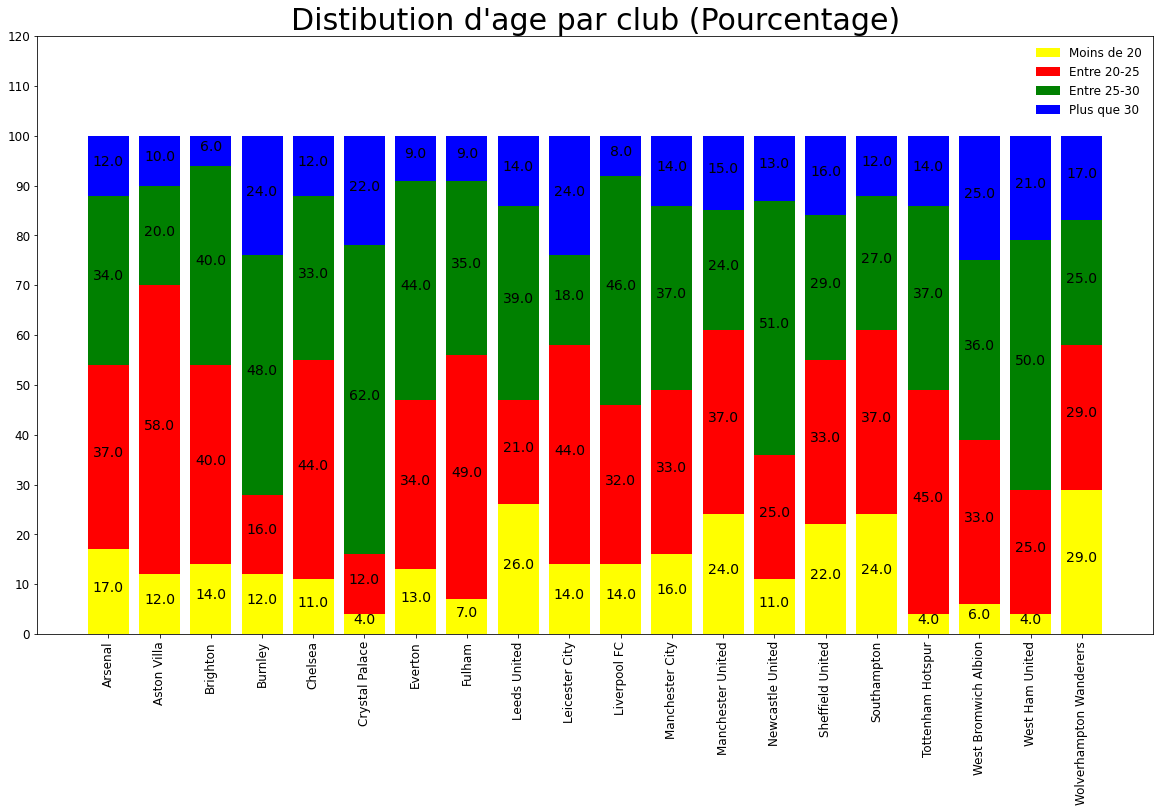

In [12]:
#Graphe de distibution d'age par club (pourcentages)
tot = epl_df[['Club','Age']].groupby('Club').count()['Age'] / 100
x1 = players_under_20[['Age', 'Club']].groupby('Club').count()['Age'] // tot
x2 = plyayers_between_20_25[['Age', 'Club']].groupby('Club').count()['Age'] // tot + x1
x3 = players_between_25_30[['Age', 'Club']].groupby('Club').count()['Age'] // tot + x2
x4 = 100 - x3 + x3
clubs = players_under_20[['Age', 'Club']].groupby('Club').count().index

fig, ax = plt.subplots(figsize=(20, 11))

ax.bar(clubs, x1, label = "Moins de 20", color='yellow')
ax.bar(clubs, x2 - x1,bottom= x1,label = "Entre 20-25", color='r')
ax.bar(clubs, x3 - x2,bottom= x2, label = "Entre 25-30",color='g')
ax.bar(clubs, x4 - x3,bottom= x3,label = "Plus que 30", color='b')

plt.xticks(clubs,rotation = 90, fontsize=12)
plt.yticks(np.arange(0,121,10), fontsize=12)
plt.title('Distibution d\'age par club (Pourcentage)', fontsize = 30)

for index, data in enumerate(x1):
    plt.text(x=index , y=data/2 , s=f"{data}" , fontdict=dict(fontsize=14), horizontalalignment='center')
for index, data in enumerate(x2):
    plt.text(x=index , y= x1[index] + ((data -x1[index]) /2) , s=f"{data - x1[index]}" , fontdict=dict(fontsize=14), horizontalalignment='center')
for index, data in enumerate(x3):
    plt.text(x=index , y= x2[index] + ((data -x2[index]) /2) , s=f"{data -x2[index]}" , fontdict=dict(fontsize=14), horizontalalignment='center')
for index, data in enumerate(x4):
    plt.text(x=index , y= x3[index] + ((data -x3[index]) /2) , s=f"{data -x3[index]}" , fontdict=dict(fontsize=14), horizontalalignment='center')
ax.legend(fontsize=12, frameon=False)
plt.show()

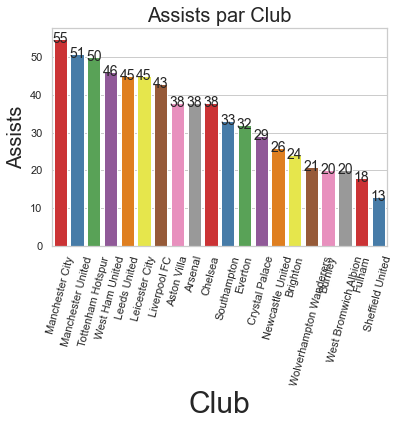

In [13]:
#Nombre de passes décisives par club
assists_by_club = pd.DataFrame(epl_df.groupby('Club', as_index=False)['Assists'].sum())
sns.set_theme(style="whitegrid", color_codes=True)
ax = sns.barplot(x='Club', y='Assists', data=assists_by_club.sort_values(by='Assists', ascending=False), palette='Set1')
ax.set_xlabel('Club', fontsize=30)
ax.set_ylabel('Assists', fontsize=20)
plt.xticks(rotation=75)
plt.title('Assists par Club', fontsize=20)
for ig, dg in enumerate(assists_by_club.sort_values(by='Assists', ascending=False)['Assists']):
    plt.text(x=ig, y=dg, s=f"{dg}", fontdict=dict(fontsize=14), horizontalalignment='center', verticalalignment='center')
plt.rcParams['figure.figsize'] = (20,8)
plt.show()

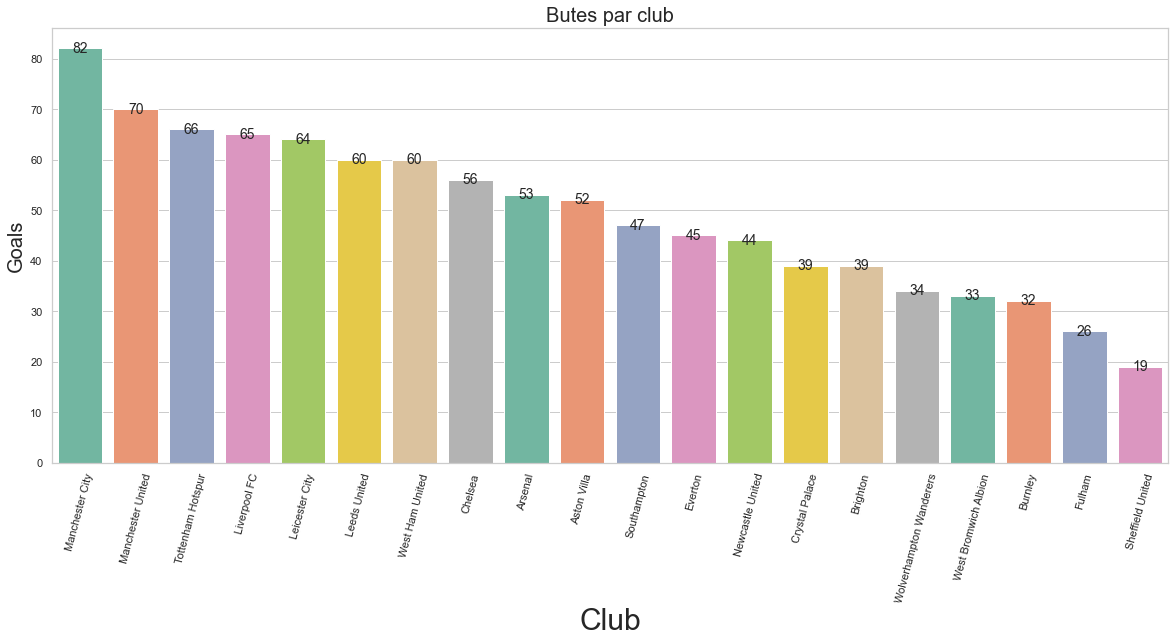

In [14]:
#Graphe des but par club
goals_by_club = pd.DataFrame(epl_df.groupby('Club', as_index=False)['Goals'].sum())
sns.set_theme(style="whitegrid", color_codes=True)
ax = sns.barplot(x='Club', y='Goals', data=goals_by_club.sort_values(by='Goals', ascending=False), palette='Set2')
ax.set_xlabel('Club', fontsize=30)
ax.set_ylabel('Goals', fontsize=20)
plt.xticks(rotation=75)
plt.rcParams['figure.figsize'] = (20,8)
plt.title('Butes par club', fontsize=20)
for ig, dg in enumerate(goals_by_club.sort_values(by='Goals', ascending=False)['Goals']):
    plt.text(x=ig, y=dg, s=f"{dg}", fontdict=dict(fontsize=14), horizontalalignment='center', verticalalignment='center')
plt.show()

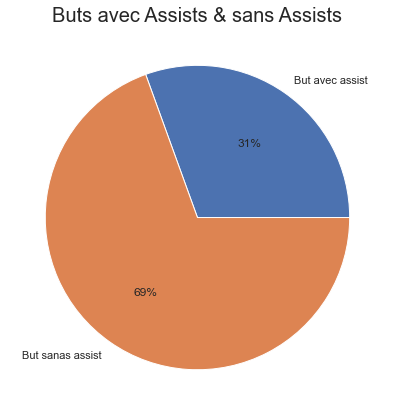

In [15]:
#Butes avec/sans assist
plt.figure(figsize=(14,7))
assists = epl_df['Assists'].sum()
goals = epl_df['Goals'].sum()
data = [goals-assists,assists]
labels = ['But avec assist','But sanas assist']
color = sns.color_palette()
plt.title('Buts avec Assists & sans Assists', fontsize = 20)
plt.pie(data, labels=labels, colors=color, autopct='%.0f%%')
plt.show()

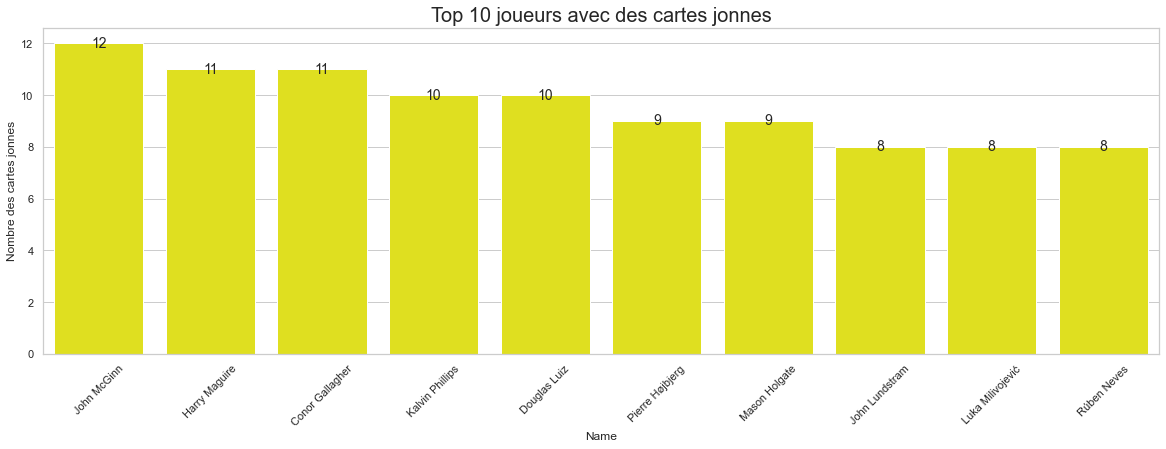

In [16]:
#Top 10 joueurs avec des cartes jonnes
top_10_players_with_yellow_cards = epl_df.sort_values(by='Yellow_Cards',ascending=False)[:10]
plt.figure(figsize=(20,6))
plt.title('Top 10 joueurs avec des cartes jonnes', fontsize = 20)
c = sns.barplot(x=top_10_players_with_yellow_cards['Name'], y=top_10_players_with_yellow_cards['Yellow_Cards'], label='Players', color='yellow')
plt.ylabel('Nombre des cartes jonnes')
c.set_xticklabels(c.get_xticklabels(), rotation=45)
for ig, dg in enumerate(top_10_players_with_yellow_cards['Yellow_Cards']):
    plt.text(x=ig, y=dg, s=f"{dg}", fontdict=dict(fontsize=14), horizontalalignment='center', verticalalignment='center')
plt.show()

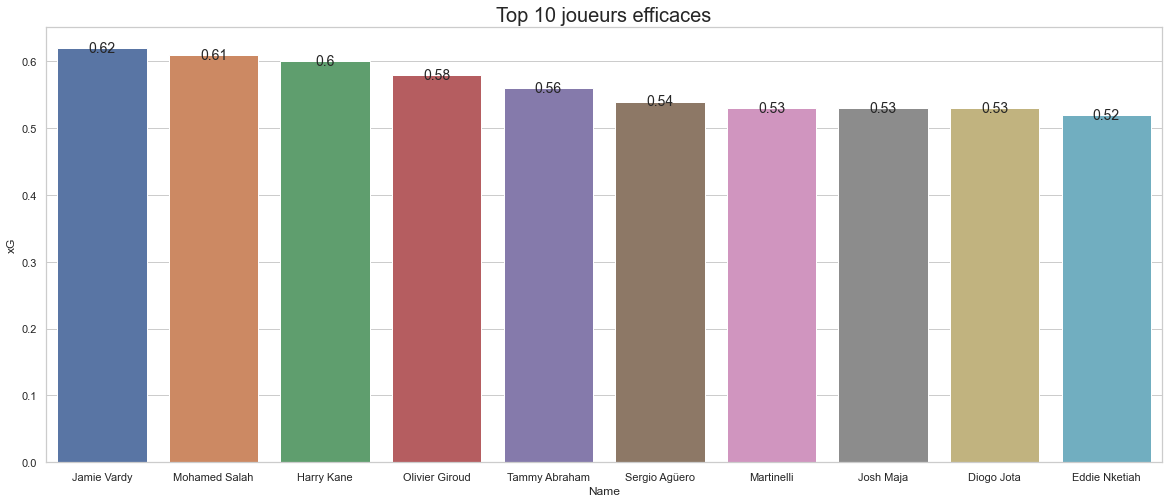

In [17]:
#Joueurs efficaces
df = epl_df[epl_df['Matches']>10].sort_values('xG',ascending=False)[['Name','xG','Goals','Club','Position']].head(10)
ax = sns.barplot(x="Name", y="xG", data=df)
for ig, dg in enumerate(df['xG']):
    plt.text(x=ig, y=dg, s=f"{dg}", fontdict=dict(fontsize=14), horizontalalignment='center', verticalalignment='center')
plt.title('Top 10 joueurs efficaces', fontsize = 20)
plt.show()

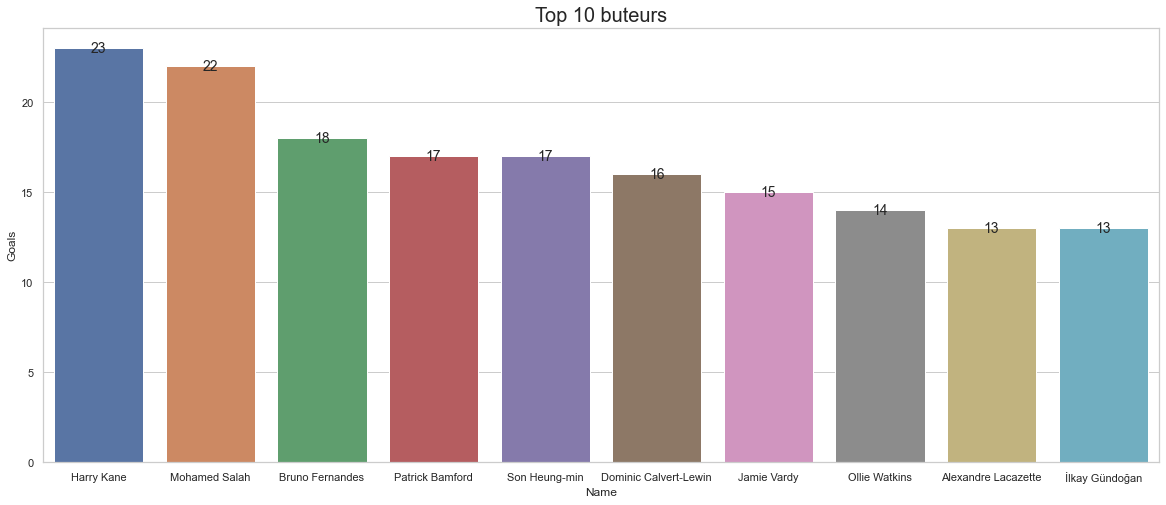

In [18]:
#Meileurs butteurs
df = epl_df[epl_df['Matches']>10].sort_values('Goals',ascending=False)[['Name','xG','Goals','Club','Position']].head(10)
ax = sns.barplot(x="Name", y="Goals", data=df)
for ig, dg in enumerate(df['Goals']):
    plt.text(x=ig, y=dg, s=f"{dg}", fontdict=dict(fontsize=14), horizontalalignment='center', verticalalignment='center')
plt.title('Top 10 buteurs', fontsize = 20)
plt.show()

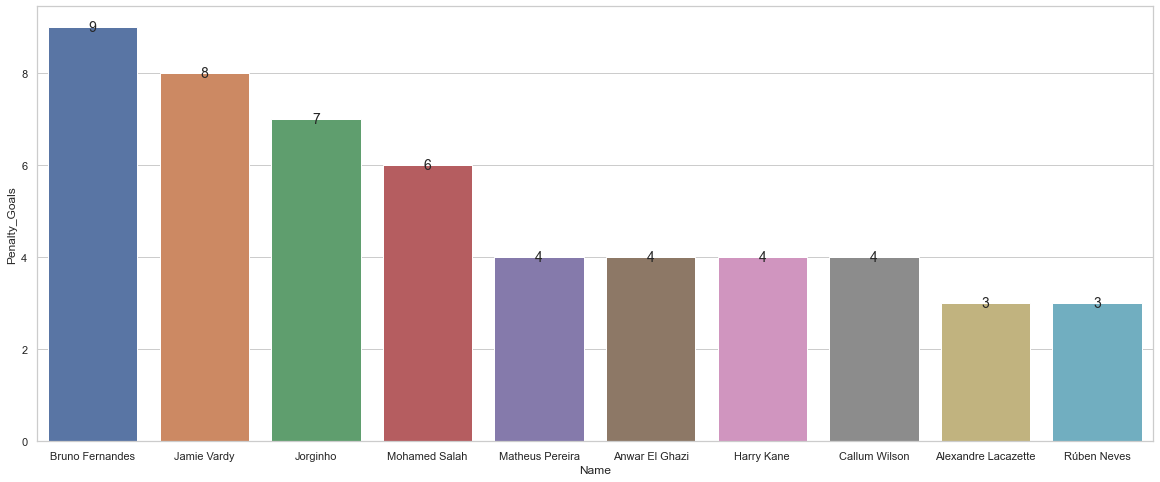

In [19]:
df = epl_df[epl_df['Penalty_Goals']>0].sort_values('Penalty_Goals',ascending=False)[['Name','Penalty_Attempted','Penalty_Goals','Club','Position']].head(10)
ax = sns.barplot(x="Name", y="Penalty_Goals", data=df)
for ig, dg in enumerate(df['Penalty_Goals']):
    plt.text(x=ig, y=dg, s=f"{dg}", fontdict=dict(fontsize=14), horizontalalignment='center', verticalalignment='center')
plt.show()

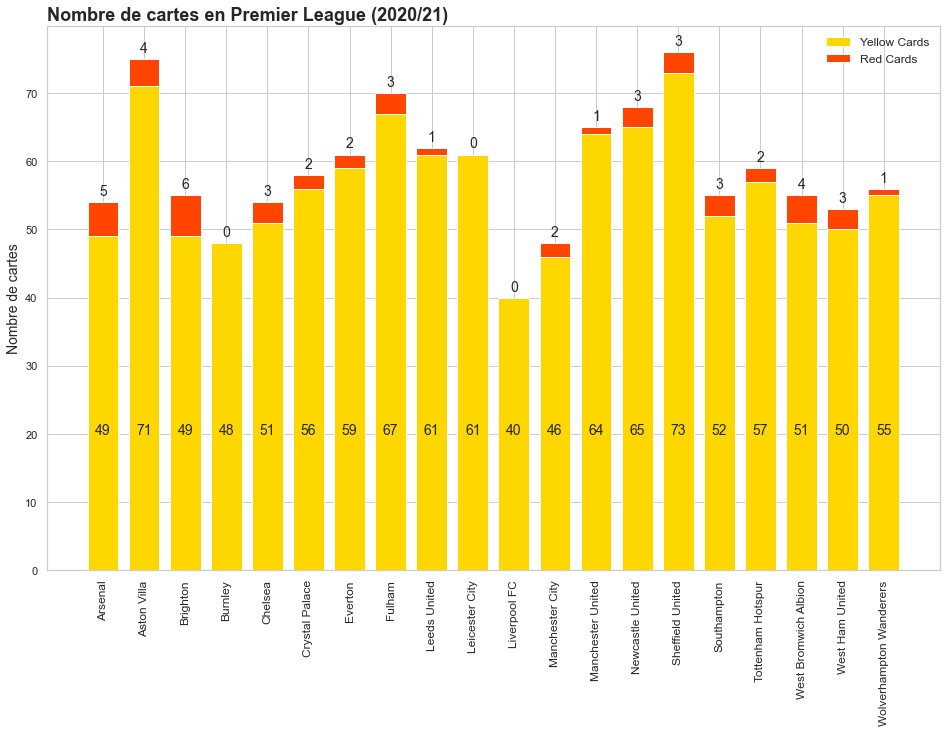

In [20]:
#Nombre de cartes par club
redyello = epl_df[['Club','Red_Cards','Yellow_Cards']]
df_1 = redyello.groupby('Club', as_index=False).agg({"Red_Cards": "sum", "Yellow_Cards": "sum"})
countries = df_1["Club"]
red_cards = df_1['Red_Cards']
yellow_cards = df_1['Yellow_Cards']

width = 0.75
fig, ax = plt.subplots(figsize=(16, 10))

ax.bar(countries, yellow_cards, width, label='Yellow Cards', color='gold')
ax.bar(countries, red_cards, width, bottom=yellow_cards, label='Red Cards', color='orangered')

ax.set_ylabel('Nombre de cartes', fontsize=14)
ax.set_title('Nombre de cartes en Premier League (2020/21)', loc='left', fontsize=18, fontweight ='bold')
plt.xticks(countries, rotation=90, fontsize=12)

for index, data in enumerate(red_cards):
    plt.text(x=index , y=data + yellow_cards[index] + 1 , s=f"{data}" , fontdict=dict(fontsize=14), horizontalalignment='center')

for index, data in enumerate(yellow_cards):
    plt.text(x=index , y=20 , s=f"{data}" , fontdict=dict(fontsize=14), horizontalalignment='center')

ax.legend(fontsize=12, frameon=False)

plt.show()

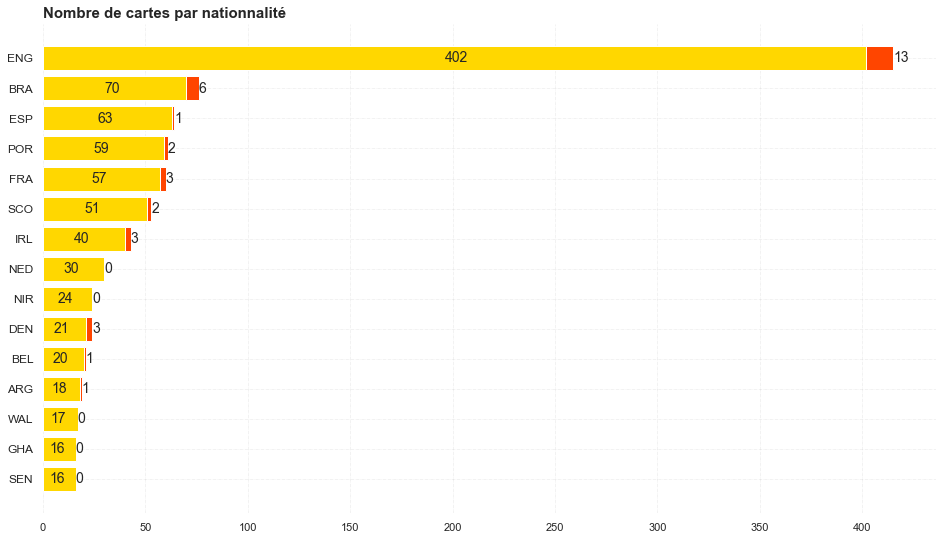

In [21]:
#Nombre de cartes par nationnalité
df_2 = epl_df[['Name','Nationality','Yellow_Cards','Red_Cards']].groupby('Nationality').agg({'Yellow_Cards':'sum', 'Red_Cards':'sum','Name':'count'}).sort_values(by=['Yellow_Cards', 'Red_Cards'], ascending=False).head(15)
df_2.rename(columns={'Name':'#_Players'}, inplace=True)

countries = df_2.index
red_cards = df_2['Red_Cards']
yellow_cards = df_2['Yellow_Cards']

fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(countries, yellow_cards, color='gold')
ax.barh(countries, red_cards, left=yellow_cards, color='orangered')
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
x_red = red_cards.tolist()
y_yellow = yellow_cards.tolist()
for index, data in enumerate(x_red):
    plt.text(x=data + y_yellow[index], y=index , s=f"{data}" , fontdict=dict(fontsize=14), verticalalignment='center')
for index, data in enumerate(y_yellow):
    plt.text(x=data /2 - 5, y=index, s=f"{data}" , fontdict=dict(fontsize=14), verticalalignment='center')
ax.set_title('Nombre de cartes par nationnalité',
             loc ='left', size=15, fontweight ='bold' )
plt.yticks(fontsize=12)
plt.show()

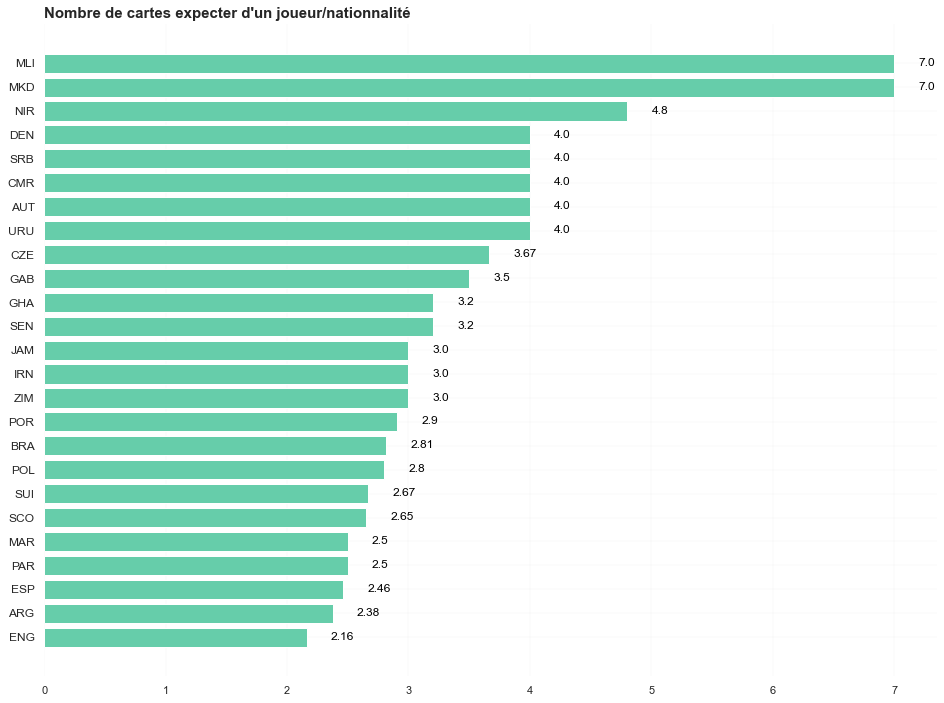

In [22]:
#Nombre de carte expecter de un joueur/nationnalité
cards_per_nation = epl_df[['Name', 'Nationality', 'Yellow_Cards', 'Red_Cards']].groupby('Nationality').agg({'Yellow_Cards':'sum', 'Red_Cards':'sum', 'Name':'count'})
cards_per_nation['Total_Cards'] = cards_per_nation.Yellow_Cards + cards_per_nation.Red_Cards
cards_per_nation.rename(columns={'Name':'#_Players'}, inplace=True)
cards_per_nation['Cards_per_Player'] = cards_per_nation['Total_Cards'] / cards_per_nation['#_Players']
cards_per_nation = cards_per_nation.sort_values(by=['Cards_per_Player', '#_Players'], ascending=False).reset_index().head(25)
countries = cards_per_nation['Nationality']
cards = cards_per_nation['Cards_per_Player']
fig, ax = plt.subplots(figsize =(16, 12))
ax.barh(countries, cards, color='mediumaquamarine')
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.grid(b = True, color ='grey',
        linestyle ='-', linewidth = 0.2,
        alpha = 0.2)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize=12,color='black')

ax.set_title('Nombre de cartes expecter d\'un joueur/nationnalité',
             loc='left', size=15, fontweight='bold')
plt.yticks(fontsize=12)
plt.show()

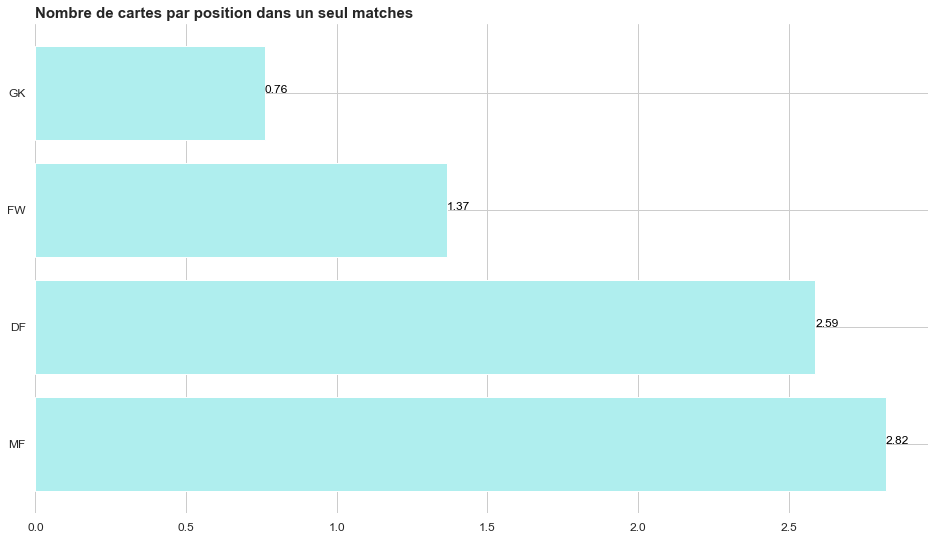

In [23]:
#Nombre de cartes par position de jeux
cards_per_position = epl_df[['Name','Position', 'Yellow_Cards', 'Red_Cards']].groupby('Position').agg({'Yellow_Cards':'sum', 'Red_Cards':'sum', 'Name':'count'}).reset_index()
cards_per_position['Total_Cards'] = cards_per_position.Yellow_Cards + cards_per_position.Red_Cards
cards_per_position.rename(columns={'Name':'#_Players'}, inplace=True)
cards_per_position['Cards_per_Position'] = cards_per_position['Total_Cards'] / cards_per_position['#_Players']
cards_per_position = cards_per_position.reset_index(drop=True).sort_values(by=['Cards_per_Position', '#_Players'],ascending=False)
positions = cards_per_position['Position']
cards = cards_per_position['Cards_per_Position']

fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(positions, cards, color='paleturquoise')

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.4,
             str(round((i.get_width()), 2)),
             fontsize = 12,
             color ='black') 
# fontweight ='bold'
ax.set_title('Nombre de cartes par position dans un seul matches',
             loc ='left', size=15, fontweight ='bold' )

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

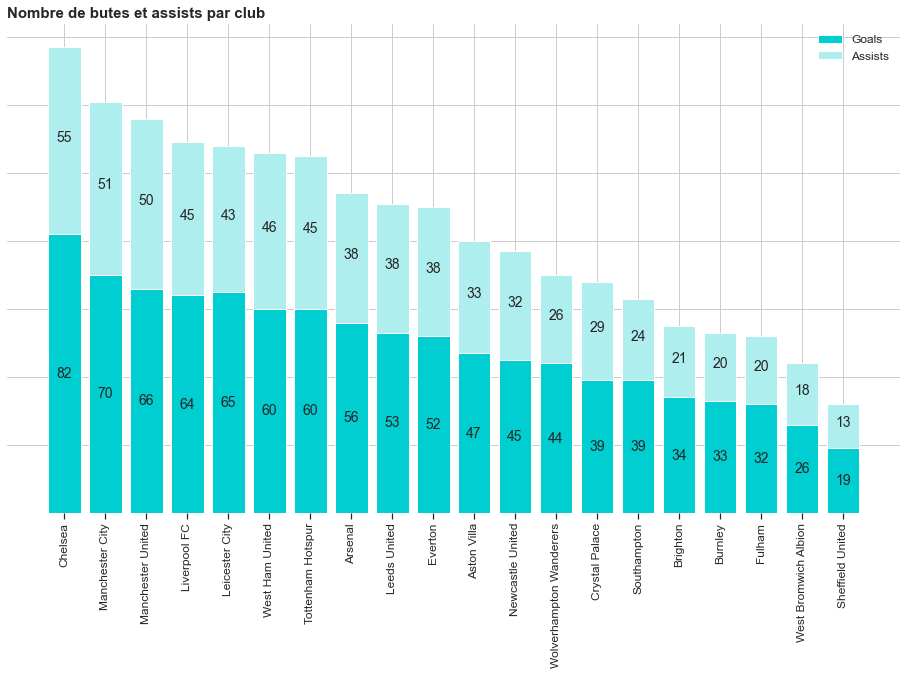

In [24]:
#Butes et assists par club
df_goals = epl_df.copy()
df_goals['xGoals'] = round(df_goals.xG * df_goals.Matches,0).astype(int)
df_goals['xG_diff'] =  (df_goals.Goals - df_goals.xGoals).astype(int)
df_goals = df_goals[['Name', 'Club', 'Nationality', 'Position', 'Goals', 'xGoals', 'xG_diff', 'Assists']].groupby('Club').sum()
df_goals['Canadian_Points'] = df_goals.Goals + df_goals.Assists
df_goals = df_goals.sort_values(by='Canadian_Points', ascending=False) 
df_goals
goals = df_goals['Goals']
assists = df_goals['Assists']
clubs = epl_df['Club'].unique()
fig, ax = plt.subplots(figsize =(16, 9))
ax.bar(clubs, goals, label="Goals", color='darkturquoise')
ax.bar(clubs, assists, bottom=goals, label="Assists", color='paleturquoise')
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
x_goals = goals.tolist()
x_assists = assists.tolist()
for ia, da in enumerate(x_assists):
    plt.text(x=ia, y=da / 2 + x_goals[ia] + 1, s=f"{da}", fontdict=dict(fontsize=14), horizontalalignment='center', verticalalignment='center')
for ig, dg in enumerate(x_goals):
    plt.text(x=ig, y=dg / 2, s=f"{dg}", fontdict=dict(fontsize=14), horizontalalignment='center', verticalalignment='center')
ax.set_title('Nombre de butes et assists par club',
             loc='left', size=15, fontweight='bold')
ax.legend(fontsize=12, frameon=False)
plt.tick_params(left = False, right = False, labelleft=False, labelbottom=True, bottom=True)
plt.xticks(clubs,rotation=90,fontsize=12)
plt.show()

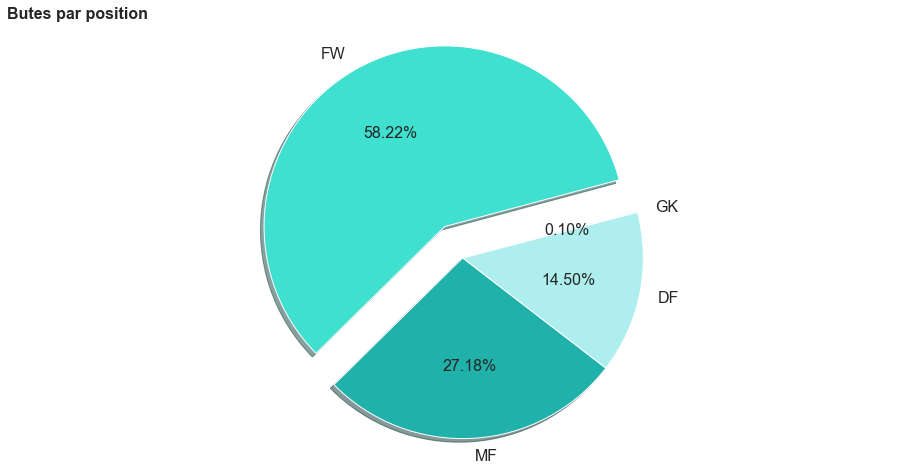

In [25]:
#Pourcentages des butes par position
# variables
my_labels = epl_df[['Position','Goals']].groupby(['Position']).sum().sort_values(by=['Goals'],ascending=False).head(10).index.tolist()
my_colors = ['turquoise','lightseagreen','paleturquoise','darkturquoise']
myexplode = [0.2, 0, 0, 0]
# plot
epl_df[['Position','Goals']].groupby(['Position']).sum().sort_values(by=['Goals'],ascending=False).head(10)\
        .plot(x='Name',kind='pie', figsize=(16,8), subplots=True, labels=my_labels,startangle=15, 
        shadow=True, colors=my_colors, explode=myexplode, autopct='%1.2f%%', fontsize=16)
plt.title('Butes par position', loc ='left', size=16, fontweight ='bold')
plt.ylabel(None)
plt.axis('equal')
plt.legend([],frameon=False)
plt.show()

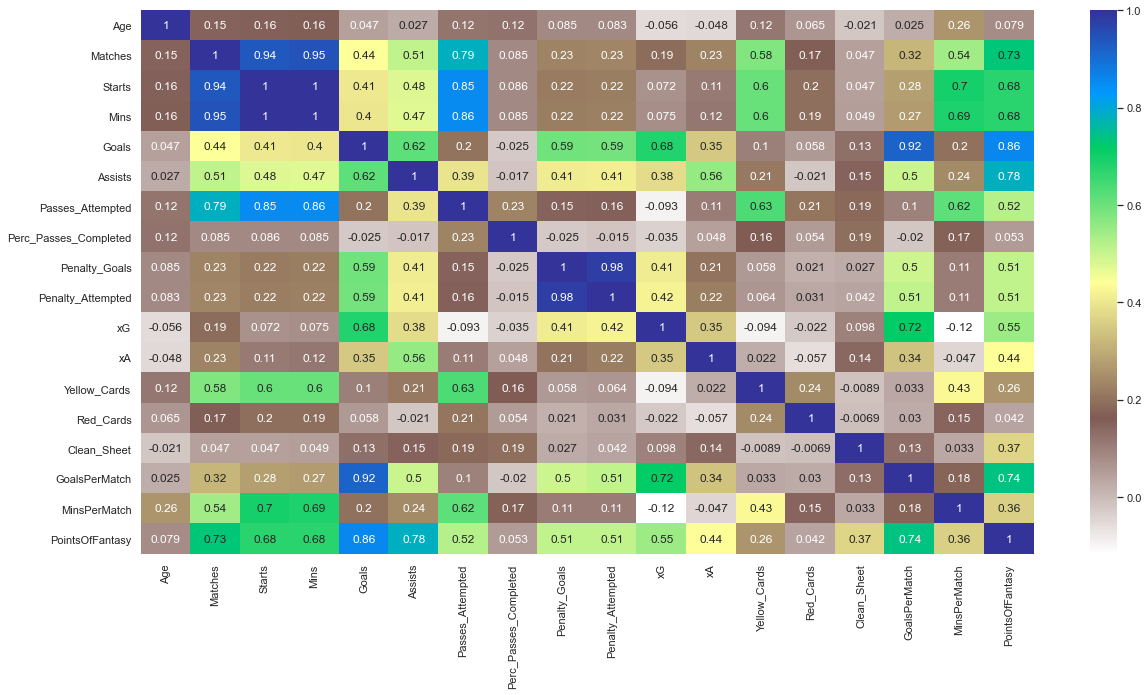

In [26]:
#Matrice de correlation----------------------------------------------
corr_matrix = epl_df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.terrain_r)
plt.show()

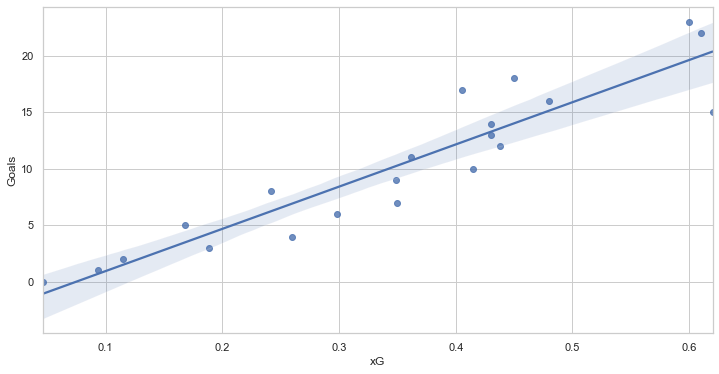

In [27]:
#Regression Lineaire entre les butes et les butes expectée
df = epl_df[['Goals','xG']].groupby('Goals', as_index=False).mean()
plt.figure(figsize=(12,6))
sns.regplot(x="xG", y="Goals", data=df)
plt.show()

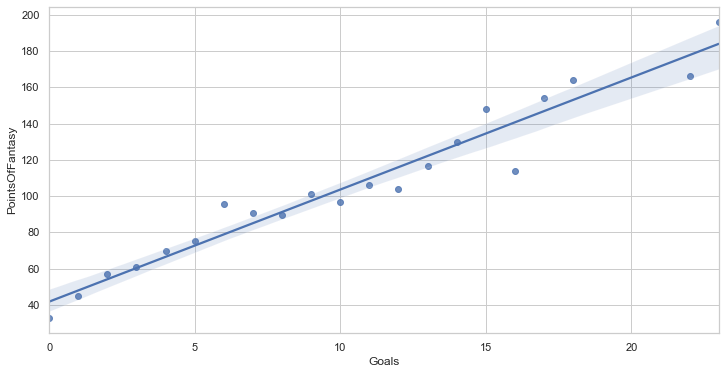

In [28]:
#Regression Lineaire entre les butes et les points de performance par joueur
df = epl_df[['Goals','PointsOfFantasy']].groupby('Goals', as_index = False).mean()
plt.figure(figsize=(12,6))
sns.regplot(x="Goals", y="PointsOfFantasy", data=df)
plt.show()

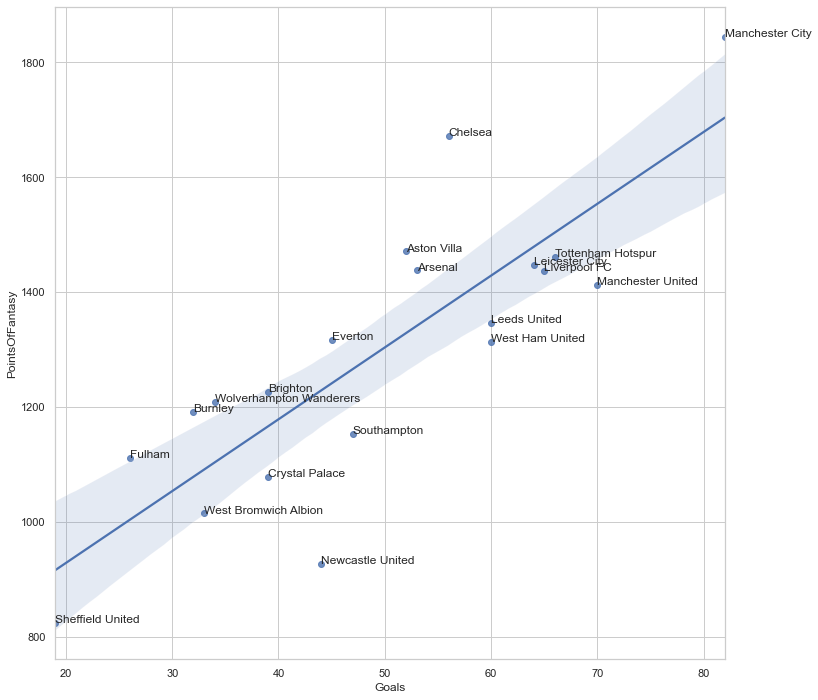

In [29]:
#Regression Lineaire entre les butes et les points de performance par club
df = epl_df[["Club","Goals","PointsOfFantasy"]].groupby("Club").sum()
plt.figure(figsize=(12,12))
x = df["Goals"]
y = df["PointsOfFantasy"]
sns.regplot(x="Goals", y="PointsOfFantasy", data=df)
for i in range(20):
    plt.annotate(df.index[i],(x[i],y[i]))
plt.show()

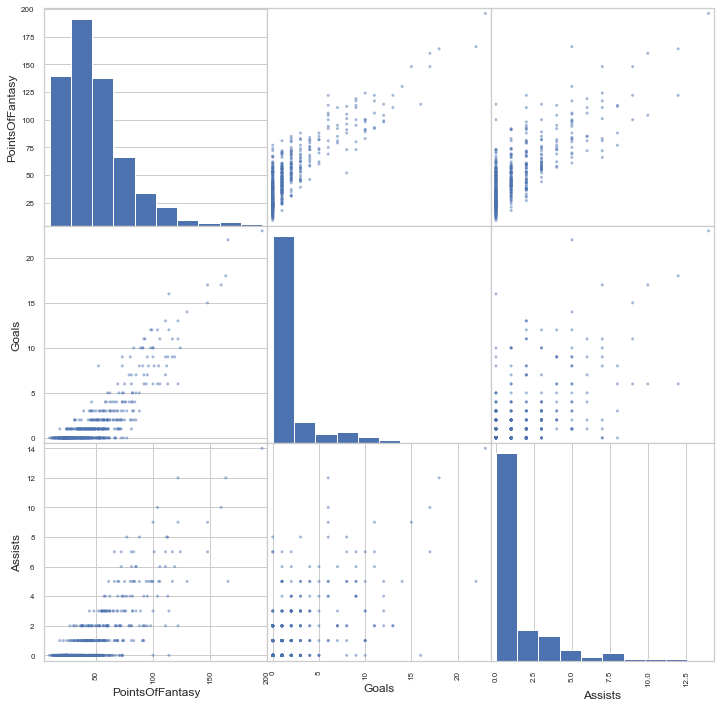

In [30]:
#Regresion multiple butes / assists / Points de performance
colors = epl_df['Performance_Cat'].astype('category')
# Les couleurs déduites de chaque categorie de performance
y = colors.cat.codes 
rg_mu = epl_df[["PointsOfFantasy","Goals","Assists"]]
scatter_matrix(rg_mu,alpha = 0.5,figsize=(12,12),range_padding=0.05)
plt.show()

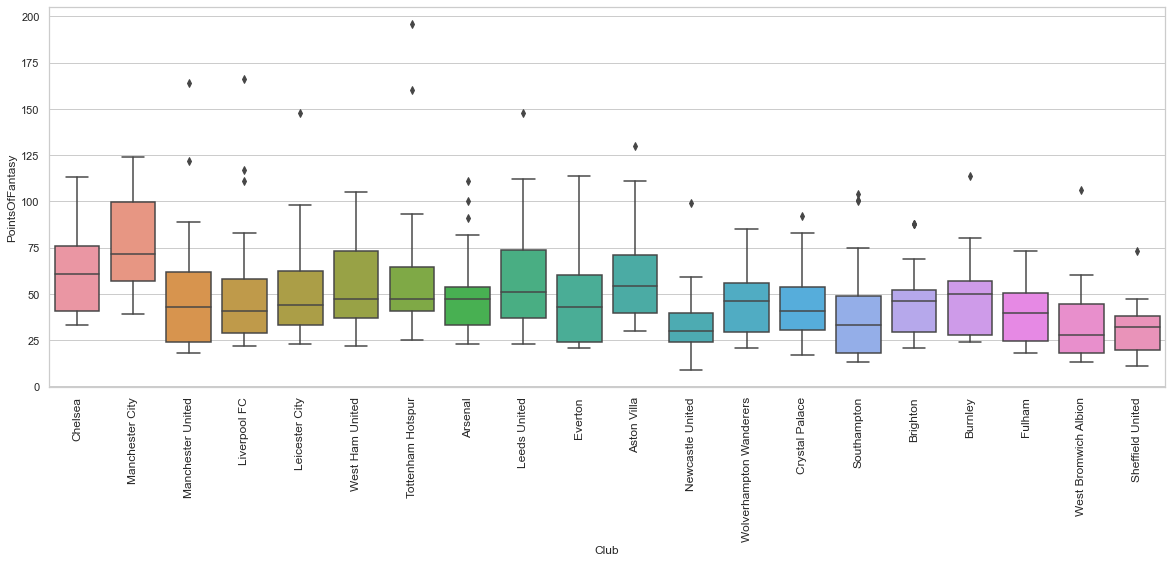

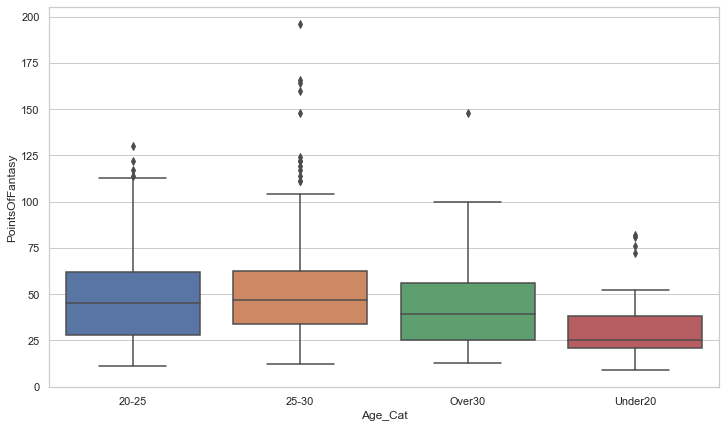

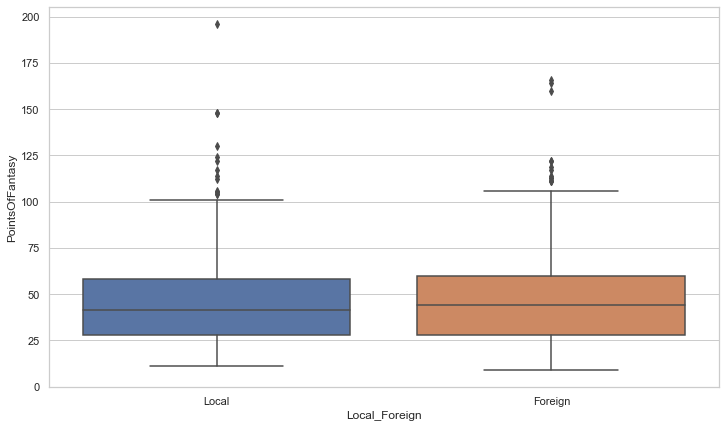

In [31]:
#ANOVA
#Boite a moustache 1 variable
plt.figure(figsize=(20,7))
sns.boxplot(x = 'Club', y = 'PointsOfFantasy', data = epl_df)
plt.xticks(rotation=90, fontsize=12)
plt.show()
#Boite a moustache deux variables
#Effet de l'age
plt.figure(figsize=(12,7))
sns.boxplot(x = 'Age_Cat', y = 'PointsOfFantasy', data = epl_df)
plt.show()
#effet de nationnalité
plt.figure(figsize=(12,7))
sns.boxplot(x = 'Local_Foreign', y = 'PointsOfFantasy', data = epl_df)
plt.show()

In [32]:
#application de ANOVA1
model = ols('PointsOfFantasy ~ C(Club)', data=epl_df).fit()
print(sm.stats.anova_lm(model, typ=1))
#Application ANOVA2
model = ols('PointsOfFantasy ~ C(Local_Foreign) + C(Age_Cat) + C(Local_Foreign):C(Age_Cat)', data=epl_df).fit()
sm.stats.anova_lm(model, typ=2)

             df         sum_sq      mean_sq         F        PR(>F)
C(Club)    19.0   62169.150925  3272.060575  5.033494  4.765514e-11
Residual  512.0  332829.426143   650.057473       NaN           NaN


,sum_sq,df,F,PR(>F)
C(Local_Foreign),432.570694,1.0,0.607284,0.436164
C(Age_Cat),21534.981297,3.0,10.077622,0.000002
C(Local_Foreign):C(Age_Cat),215.055315,3.0,0.100638,0.959630
Residual,373247.105239,524.0,NaN,NaN


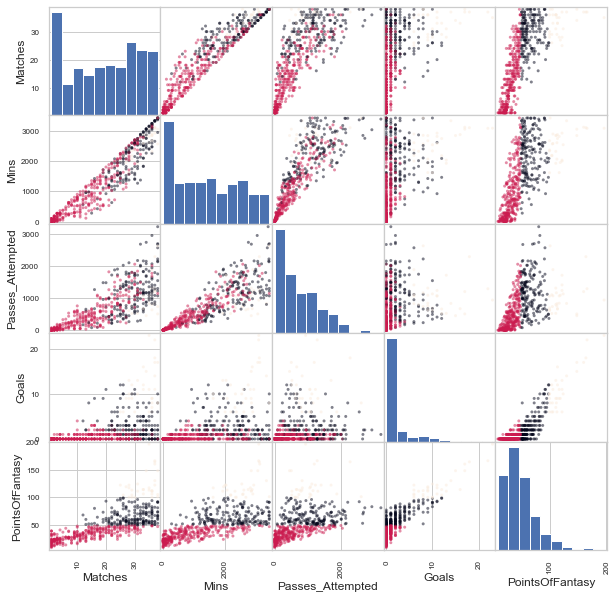

In [33]:
#ACP - Affichage des nuages des points par couples de variables :
acp_df = epl_df[['Matches','Mins','Passes_Attempted','Goals','PointsOfFantasy']]
colors = epl_df['Performance_Cat'].astype('category')
# Les couleurs déduites de chaque categorie de performance
y = colors.cat.codes 
scatter_matrix(acp_df,alpha = 0.5,figsize=(10,10),range_padding=0.05,c=y)
plt.show()

In [34]:
#Centralisation et reduction des donnees
X= acp_df
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X) 
X = scale(X)

In [35]:
#Definition de l'acp
mypca = PCA(n_components = 3) # On paramètre ici pour ne garder que 3 composantes
# Modèle d'ACP
mypca.fit(X)
# Pourcentage de la variance expliquée par chacune des composantes sélectionnées.
print('\nPourcentage de la variance expliquée par chacune des composantes sélectionnées.')
print(mypca.singular_values_) # Valeurs de variance
print(mypca.explained_variance_ratio_) #  Pourcentages
# Axes principaux dans l'espace des caractéristiques, représentant les directions de la variance maximale dans les données. Les composantes sont triées par variance expliquée.
print(" \nAxes principaux dans l'espace des caractéristiques, représentant les directions de la variance maximale dans les données. Les composantes sont triées par variance expliquée.")
print(mypca.components_)
# Résultats de l'ACP
print(" \nRésultats de l'ACP")
data_sortie= mypca.fit_transform(X)
data_sortie


Pourcentage de la variance expliquée par chacune des composantes sélectionnées.
[43.85675772 24.00654699 10.02666682]
[0.72308842 0.21665951 0.03779475]
 
Axes principaux dans l'espace des caractéristiques, représentant les directions de la variance maximale dans les données. Les composantes sont triées par variance expliquée.
[[ 0.49359883  0.49107811  0.42750091  0.34366901  0.46296551]
 [-0.19780776 -0.27911358 -0.46304852  0.70803843  0.40894418]
 [-0.57424087 -0.27608543  0.74697237  0.16608348  0.09204794]]
 
Résultats de l'ACP


array([[ 3.57318349,  0.2153274 ,  0.58672814],
       [ 1.32099333, -0.96987632, -0.61796416],
       [ 2.79967501,  1.18870061, -0.51412543],
       ...,
       [-2.74856363,  0.25034214,  0.20449833],
       [-2.7503903 ,  0.25207813,  0.20239483],
       [-2.75578001,  0.25549037,  0.20385971]])

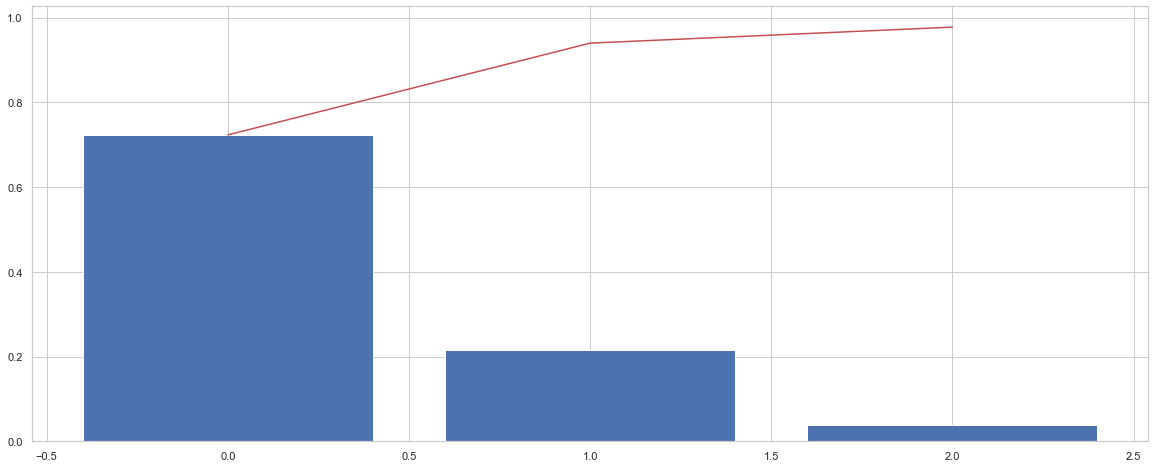

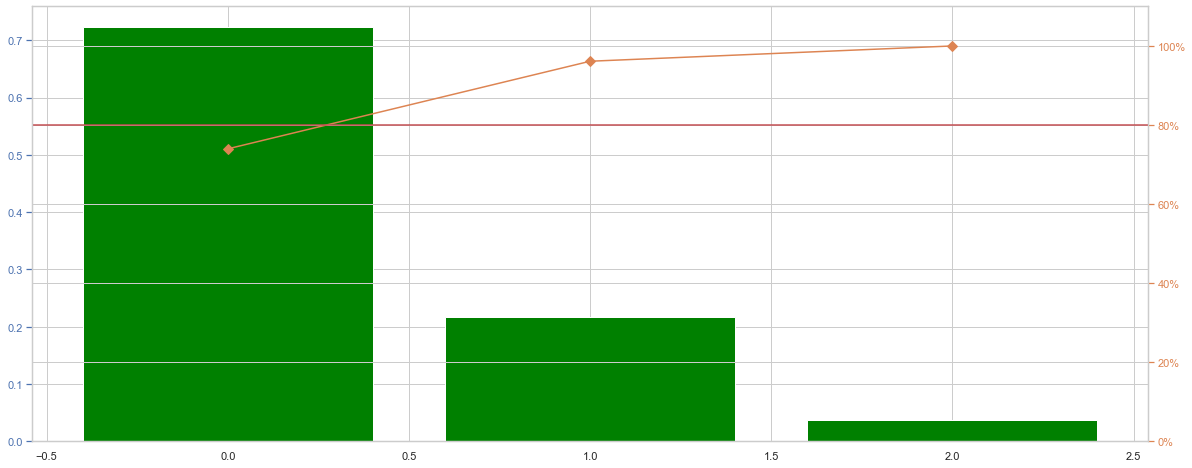

In [36]:
#Niveau de representation de chaque composant
y = list(mypca.explained_variance_ratio_)
x = range(len(y))
ycum = np.cumsum(y)
plt.bar(x,y)
plt.plot(x,ycum,"-r")
plt.show()


def pareto(data) :
    y = list(data)
    x = range(len(data))
    ycum = np.cumsum(y)/sum(y)*100
    fig, ax = plt.subplots()
    ax.bar(x,y,color="Green")
    ax2 = ax.twinx()
    ax2.plot(x,ycum, color="C1", marker="D", ms=7)
    ax2.axhline(y=80,color="r")
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")
    plt.ylim(0,110)
    plt.show()
pareto(mypca.explained_variance_ratio_)
plt.show()

In [37]:
#Mothode de decin du cercle avec les points et les variables
def biplot(pca=[],x=None,y=None,components=[0,1],score=None,coeff=None,coeff_labels=None,score_labels=None,circle='T',bigdata=1000,cat=None,cmap="viridis",density=True):
    if isinstance(pca,PCA)==True :
        coeff = np.transpose(pca.components_[components, :])
        score=  pca.fit_transform(x)[:,components]
        if isinstance(x,pd.DataFrame)==True :
            coeff_labels = list(x.columns)
    if score is not None : x = score
    if x.shape[1]>1 :
        xs = x[:,0]
        ys = x[:,1]
    else :
        xs = x
        ys = y
    if (len(xs) != len(ys)) : print("Warning ! x et y n'ont pas la même taille !")
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    #x_c = xs * scalex
    #y_c = ys * scaley
    temp = (xs - xs.min())
    x_c = temp / temp.max() * 2 - 1
    temp = (ys - ys.min())
    y_c = temp / temp.max() * 2 - 1
    data = pd.DataFrame({"x_c":x_c,"y_c":y_c})
    print("Attention : pour des facilités d'affichage, les données sont centrées-réduites")
    if cat is None : cat = [0]*len(xs)
    elif len(pd.Series(cat)) == 1 : cat = list(pd.Series(cat))*len(xs)
    elif len(pd.Series(cat)) != len(xs) : print("Warning ! Nombre anormal de catégories !")
    cat = pd.Series(cat).astype("category")
    fig = plt.figure(figsize=(14,14),facecolor='w') 
    ax = fig.add_subplot(111)
    # Affichage des points
    if (len(xs) < bigdata) :   
        ax.scatter(x_c,y_c, c = cat.cat.codes,cmap=cmap)
        if density==True : print("Warning ! Le mode density actif n'apparait que si BigData est paramétré.")
    # Affichage des nappes convexes (BigData)
    else :
        #color
        norm = mpl.colors.Normalize(vmin=0, vmax=(len(np.unique(cat.cat.codes)))) #-(len(np.unique(c)))
        cmap = cmap
        m = cm.ScalarMappable(norm=norm, cmap=cmap)
        if density==True :
            sns.set_style("white")
            sns.kdeplot(x="x_c",y="y_c",data=data)
            if len(np.unique(cat)) <= 1 :
                sns.kdeplot(x="x_c",y="y_c",data=data, cmap="Blues", shade=True, thresh= 0)
            else :
                for i in np.unique(cat) :
                    color_temp = m.to_rgba(i)
                    sns.kdeplot(x="x_c",y="y_c",data=data[cat==i], color=color_temp,
                                shade=True, thres=0.25, alpha=0.25)     
        for cat_temp in cat.cat.codes.unique():
            x_c_temp = [x_c[i] for i in range(len(x_c)) if (cat.cat.codes[i] == cat_temp)]
            y_c_temp = [y_c[i] for i in range(len(y_c)) if (cat.cat.codes[i] == cat_temp)]
            points = [ [ None ] * len(x_c_temp) ] * 2
            points = np.array(points)
            points = points.reshape(len(x_c_temp),2)
            points[:,0] = x_c_temp
            points[:,1] = y_c_temp
            hull = ConvexHull(points)
            temp = 0
            for simplex in hull.simplices:
                color_temp = m.to_rgba(cat_temp)
                plt.plot(points[simplex, 0], points[simplex, 1],color=color_temp)#, linestyle='dashed')#linewidth=2,color=cat)
                if (temp == 0) :
                     plt.xlim(-1,1)
                     plt.ylim(-1,1)
                     temp = temp+1
    if coeff is not None :
        if (circle == 'T') :
            x_circle = np.linspace(-1, 1, 100)
            y_circle = np.linspace(-1, 1, 100)
            X, Y = np.meshgrid(x_circle,y_circle)
            F = X**2 + Y**2 - 1.0
            #fig, ax = plt.subplots()
            plt.contour(X,Y,F,[0])
        n = coeff.shape[0]
        for i in range(n):
            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5,
                      head_width=0.05, head_length=0.05)
            if coeff_labels is None:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
            else:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, coeff_labels[i], color = 'g', ha = 'center', va = 'center')
        if score_labels is not None :
            for i in range(len(score_labels)) :
                temp_x = xs[i] * scalex
                temp_y = ys[i] * scaley
                plt.text(temp_x,temp_y,list(score_labels)[i])
    plt.xlim(-1.2,1.2)
    plt.ylim(-1.2,1.2)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid(linestyle='--')
    plt.show()

Attention : pour des facilités d'affichage, les données sont centrées-réduites
Warning ! Le mode density actif n'apparait que si BigData est paramétré.


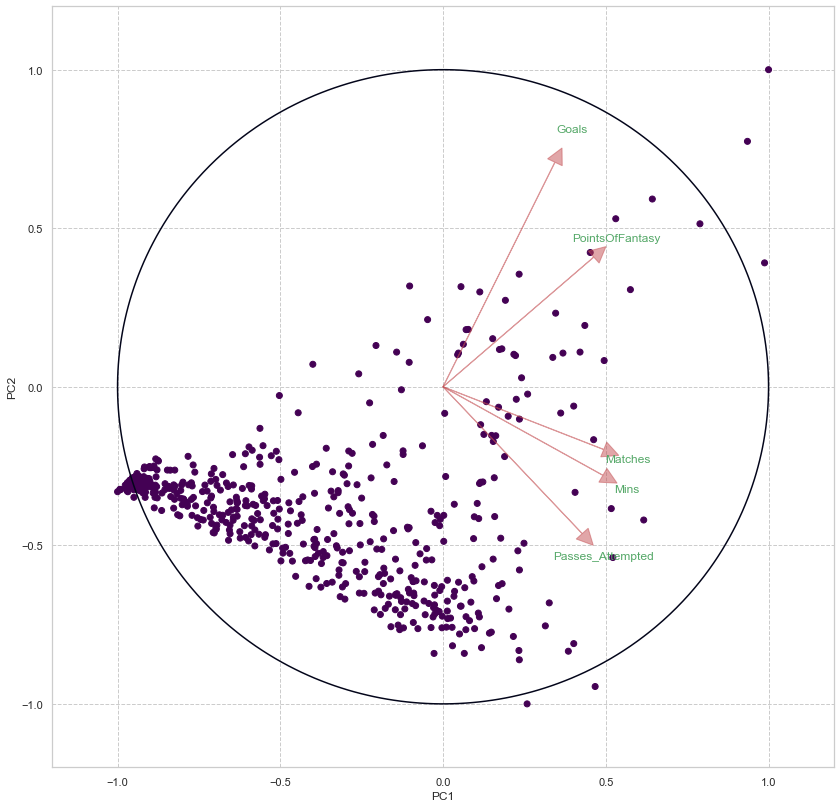

In [38]:
#Visualisation des variables
colors = epl_df['Performance_Cat'].astype('category')
y = colors.cat.codes 
biplot(mypca,x=X,components=[0,1],coeff_labels = acp_df.columns.values.tolist())
plt.show()

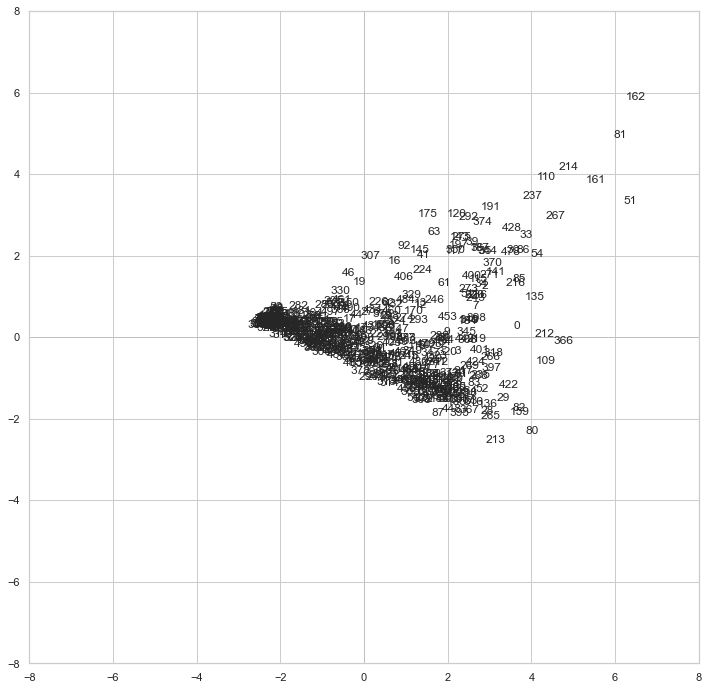

In [39]:
#positionnement des individus dans le premier plan
coord = mypca.fit_transform(X)
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-8,8) #même limites en abscisse
axes.set_ylim(-8,8) #et en ordonnée
#placement des étiquettes des observations
for i in range(530):
    plt.annotate(acp_df.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-8,8],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-8,8],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

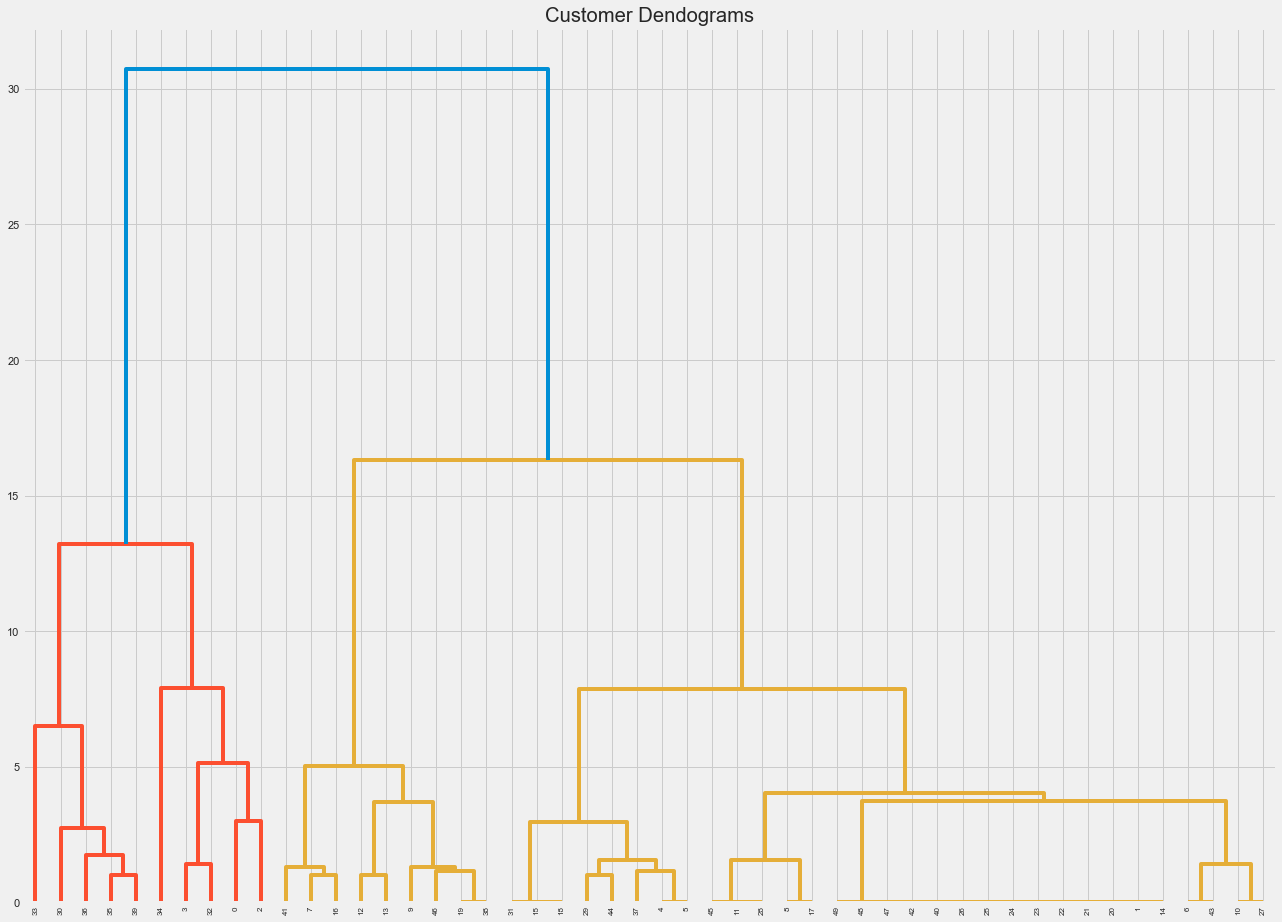

In [82]:
class_df = epl_df[['Name', 'Assists','Goals']].head(50)
data = class_df.iloc[:,1:3].values
plt.figure(figsize=(20, 15))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

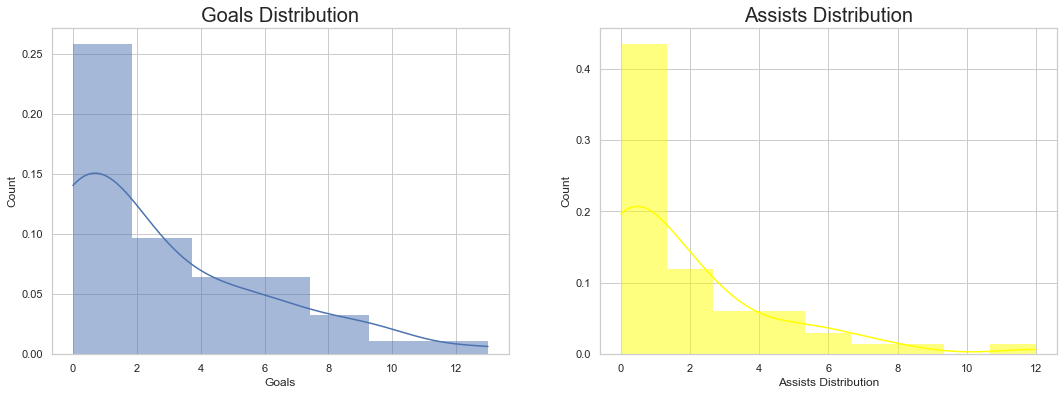

In [66]:
plt.rcParams['figure.figsize'] = (18, 6)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.histplot(class_df['Goals'], kde=True, stat="density", linewidth=0)
plt.title('Goals Distribution', fontsize = 20)
plt.xlabel('Goals')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(class_df['Assists'], color = 'yellow', kde=True, stat="density", linewidth=0)
plt.title('Assists Distribution', fontsize = 20)
plt.xlabel('Assists Distribution')
plt.ylabel('Count')
plt.show()

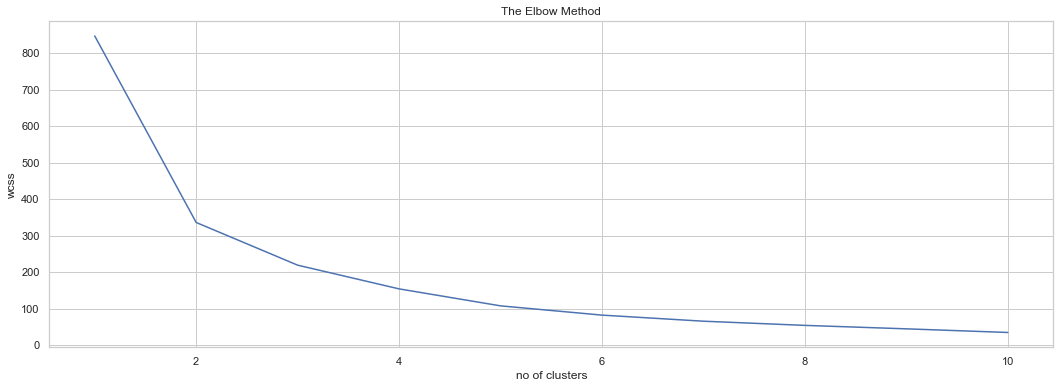

In [69]:
X= class_df.iloc[:,1:3].values
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)     
plt.plot(range(1,11), wcss,)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

##### Model Description With the help of K-mean we are able to create a cluster of players on the basis of goals and assists they provide. These clusters are as follow

- Star Performer ---->More contribution through goals than assits
- Magician -----> more contribution through assists for the team
- Tornado ------> Average contribution through assits and goal
- Contributer -----> Low contribution through assits and goal

In [70]:
kmeansmodel = KMeans(n_clusters=4 , init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
labels = kmeansmodel.labels_
class_df["label"]=labels
class_df.loc[class_df['label'] == 3, 'Category'] = 'magician'
class_df.loc[class_df['label'] == 2, 'Category'] = 'Star Performer'
class_df.loc[class_df['label'] == 1, 'Category'] = 'Tornado'
class_df.loc[class_df['label'] == 0, 'Category'] = 'contributer'

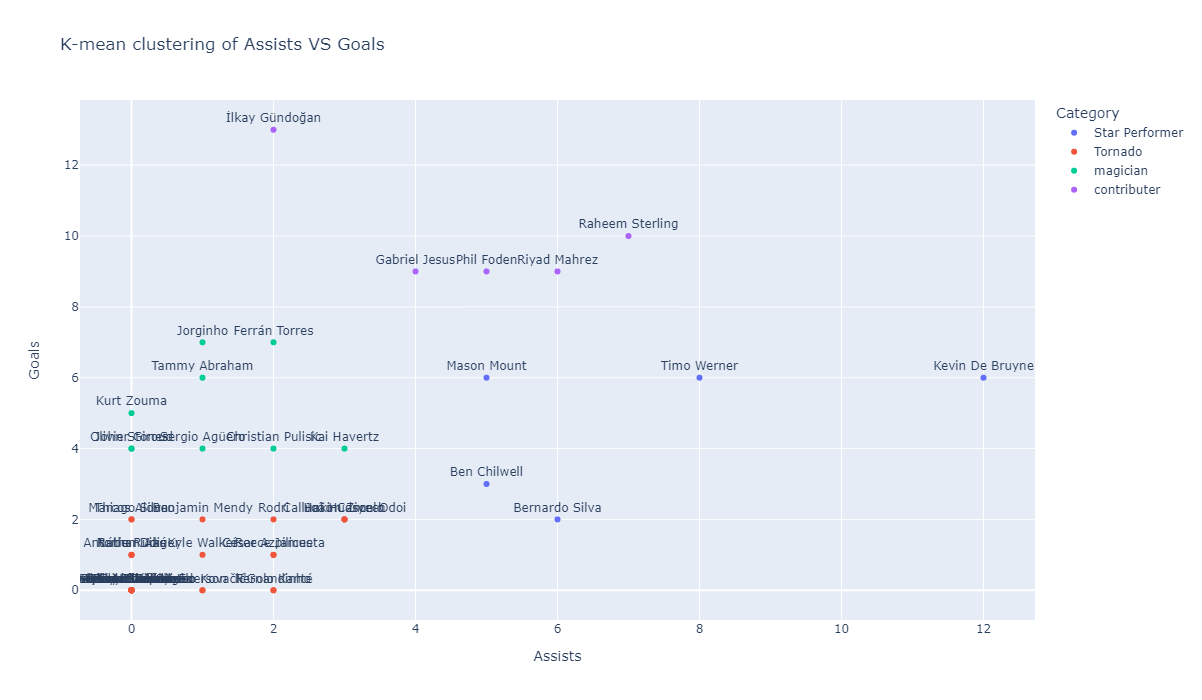

In [79]:
import plotly.express as px
fig = px.scatter(class_df,x="Assists",y="Goals",color="Category",text="Name",title="K-mean clustering of Assists VS Goals", width=900, height=700)
fig.update_traces(textposition='top center')
fig.show()

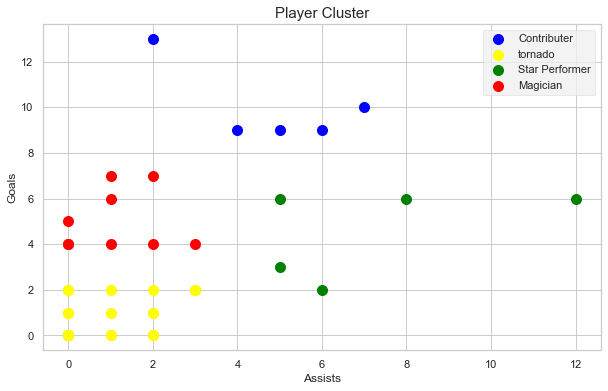

In [80]:
fig=plt.figure(figsize=(10,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Contributer')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'Yellow', label = 'tornado')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Star Performer')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'red', label = 'Magician')
plt.style.use('fivethirtyeight')
plt.title('Player Cluster', fontsize = 15)
plt.xlabel('Assists')
plt.ylabel('Goals')
plt.legend()